In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
current_directory = os.getcwd()
while current_directory.endswith("Notebooks"):
    os.chdir("..")
    current_directory = os.getcwd()
    print("Current working directory: ", current_directory)

Current working directory:  c:\Users\thomaswi\OneDrive - SINTEF\Drilling and well\Code\CodeForMaster


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from utils.filepaths.filepaths import (
    FILE_PATH_CASE_101,
    FILE_PATH_CASE_101_HFM_T,
    FILE_PATH_CASE_101_HFM_T_OBS,
    FILE_PATH_CASE_101_HFM_Z,
)

from utils.constants.constants import rad_to_deg_conversion_factor

from utils.utils.utils import get_active_drilling_data

sns.set_theme()

## Connections between the flow loop experiments and field data

This notebook examines field and simulated data to see possible connections

It starts by plotting relevant measured and simulated data.

Dimensionless numbers from the simulated data are then plotted as a function of time for 
three different locations Riser, annulus and bottom hole assembly.

Afterwards these dimensionless numbers are plotted against each other in scatterplots.

After this flow, rpm and ecd is plotted against each other for the entire dataset.

### Case 101

In [4]:
# Loading files
sensor_data_case_101 = pd.read_pickle(FILE_PATH_CASE_101)
# Extracting the dates to consider
tstamp_min = '2020-07-23 02:45:00+00:00'
tstamp_max = '2020-07-25 02:30:00+00:00'
sensor_data_case_101 = sensor_data_case_101.loc[tstamp_min:tstamp_max]

hfm_data_case_101_t = pd.read_pickle(FILE_PATH_CASE_101_HFM_T)
hfm_data_case_101_t_obs = pd.read_pickle(FILE_PATH_CASE_101_HFM_T_OBS)
hfm_data_case_101_z = pd.read_pickle(FILE_PATH_CASE_101_HFM_Z)
hfm_data_case_101_t.head()


sensor_data_case_101, hfm_data_case_101_t = get_active_drilling_data(sensor_data_case_101, hfm_data_case_101_t, include_rop_zeros=True)
hfm_data_case_101_t_obs = hfm_data_case_101_t_obs.loc[hfm_data_case_101_t.index]

In [5]:
pca = PCA(n_components = 5)
pca.fit(sensor_data_case_101)

PCA(n_components=5)

In [6]:
pca.components_

array([[ 2.51355855e-06,  2.38623210e-09,  2.51373580e-06,
         1.93320844e-09,  2.51374443e-06,  2.33222670e-20,
         6.34864354e-09, -1.40343485e-07,  1.31071533e-06,
         1.34495393e-06, -2.75502263e-09, -3.07152277e-08,
         4.21627938e-11, -6.73463967e-10, -1.22984817e-09,
         4.63084902e-09,  1.13780405e-08,  2.30935427e-08,
         5.77483214e-11,  7.32946094e-08,  1.69112084e-08,
        -7.12464537e-07,  4.67094455e-20,  7.30692690e-22,
        -9.05161729e-23,  7.96079431e-25, -8.11228997e-08,
        -9.12143521e-03,  8.86743080e-03,  1.34260935e-09,
        -9.64021357e-08,  1.86411827e-07,  2.98150823e-10,
         9.79008173e-04,  2.55207918e-06,  1.92546370e-09,
         1.00624765e-07,  1.37662121e-06,  9.99755816e-01,
        -7.18751523e-08,  2.38748576e-06, -5.08561568e-08,
         5.33226801e-12,  6.58192302e-07,  7.05847898e-07,
         5.04991891e-07,  2.61090112e-06,  2.53352187e-06,
         1.02553789e-06, -1.40425310e-08,  2.53352061e-0

In [5]:
#First and foremost interested in flow in/out , rpm, ecd, mud density in/out, rop, inclination and depths
# This code should be generalized for a dataset
flow_in_case_101 = sensor_data_case_101["FLIAVG"]
rpm_case_101 = sensor_data_case_101["RPMSAVG"]
density_in_case_101 = sensor_data_case_101["MUD_DENS_IN"]
density_out_case_101 = sensor_data_case_101["MUD_DENS_OUT"]
ecd1_case_101 = sensor_data_case_101["ASMECD1-T"]
ecd2_case_101 = sensor_data_case_101["ASMECD2-T"]
depth_case_101 = sensor_data_case_101["DEPTH_BIT"]
depth_asm1_case_101 = sensor_data_case_101["ASMDEP1-T"]
depth_asm2_case_101 = sensor_data_case_101["ASMDEP2-T"]
rop_case_101 = sensor_data_case_101["ropav"]
# Flow out is not available in the dataset
flow_in_case_101_hfm = hfm_data_case_101_t["Rate_in"]
rpm_case_101_hfm = hfm_data_case_101_t["dsRpm"]
density_in_case_101_hfm = hfm_data_case_101_t["DensityIn"]
density_out_case_101_hfm = hfm_data_case_101_t["DensityOut"]
ecd1_case_101_hfm = hfm_data_case_101_t_obs["ecdAtPos1"]
ecd2_case_101_hfm = hfm_data_case_101_t_obs["ecdAtPos2"]
rop_case_101_hfm = hfm_data_case_101_t["rop"]

In [6]:
# Pair plot for flow, rpm and ecd
flow_rpm_ecd_dict = {
    "Flow" : flow_in_case_101,
    "Rpm" : rpm_case_101,
    "ECD 1" : ecd1_case_101
}
pairplot_flow_rpm_ecd = pd.DataFrame(flow_rpm_ecd_dict)

In [7]:
# This is for the seaborn scatterplot function
dimensionless_number_dict_BHA = {
    "Reyns BHA": hfm_data_case_101_t["ReynBHA"],
    "Shields BHA": hfm_data_case_101_t["ShieldBHA"],
    "Taylor BHA": hfm_data_case_101_t["TaylBHA"],
    "Rouse BHA": hfm_data_case_101_t["RouseBHA"],
}
dimensionless_numbers_BHA = pd.DataFrame(dimensionless_number_dict_BHA)

In [8]:

# This is for the seaborn scatterplot function
dimensionless_number_dict_Ann = {
    "Reyns Ann": hfm_data_case_101_t["ReynAnn"],
    "Shields Ann": hfm_data_case_101_t["ShieldAnn"],
    "Taylor Ann": hfm_data_case_101_t["TaylAnn"],
    "Rouse Ann": hfm_data_case_101_t["RouseAnn"],
}
dimensionless_numbers_Ann = pd.DataFrame(dimensionless_number_dict_Ann)

In [9]:

# This is for the seaborn scatterplot function
dimensionless_number_dict_Riser = {
    "Reyns Riser": hfm_data_case_101_t["ReynRiser"],
    "Shields Riser": hfm_data_case_101_t["ShieldRiser"],
    "Taylor Riser": hfm_data_case_101_t["TaylRiser"],
    "Rouse Riser": hfm_data_case_101_t["RouseRiser"],
}
dimensionless_numbers_Riser = pd.DataFrame(dimensionless_number_dict_Riser)

In [10]:
print(sensor_data_case_101.columns.tolist())

['ASMDEP1-T', 'ASMECD1-T', 'ASMDEP2-T', 'ASMECD2-T', 'ASMDEP3-T', 'ASMDOFF-T', 'DHT001 Temp PCB Mean', 'ASMTVD1-T', 'ASMTVD2-T', 'ASMTVD3-T', 'IBARDENS', 'IBARDENST', 'IBARVIS3', 'IBARVIS6', 'IBARVIS100', 'IBARVIS200', 'IBARVIS300', 'IBARVIS600', 'IBARRHEOT', 'PWTA-T', 'EWTEMP-T', 'D1SS-T', 'DHT001 Depth Offset', 'Depth', 'DHT001 ECD', 'DHT001 NOV TVD', 'GAMMA_C', 'WOB', 'HKLD', 'MUD_FLOW_OUT', 'BLOCKPOS', 'DH_PRESS_ESD', 'ROP', 'TORQ', 'DH_PRESS_ECD', 'MUD_FLOW_IN', 'DH_PRESS_ESD_MIN', 'MUD_DENS_OUT', 'PUMP_PRESS', 'PIT_TOT', 'DEPTH_HOLE', 'DEPTH_HOLE_V', 'CHR_C3', 'MUD_DENS_IN', 'RPM_SURF', 'DH_PRESS_ESD_MAX', 'DEPTH_RETURNS', 'DEPTH_BIT', 'MUD_TEMP_IN', 'MUD_TEMP_OUT', 'DEP', 'ROPAVG-T', 'WOBAVG-T', 'HDEP-T', 'BPOS-T', 'DEP-T', 'FLIAVG-T', 'HKLDAVG-T', 'RPMSAVG-T', 'SPPAVG-T', 'TQABAVG-T', 'SPPAVG_AUX-T', 'PWEA-Relog', 'PWPA-Relog', 'TNPS-Relog', 'ALCDA-Relog', 'DCWAB-Relog', 'DCTAB-Relog', 'DCTA-Relog', 'D1BA-Relog', 'D1D-Relog', 'D1AX-Relog', 'D1AY-Relog', 'PWPI-Relog', 'EAAF-Relo

In [11]:
inclination_asm1 = np.arccos(sensor_data_case_101["ASMTVD1-T"].diff() / sensor_data_case_101["ASMDEP1-T"].diff())
inclination_asm2 = np.arccos(sensor_data_case_101["ASMTVD2-T"].diff() / sensor_data_case_101["ASMDEP2-T"].diff())
threshold = 3
# Visual examination gave valid estimates for the inclination
# When the drill sensor is pulled out of drilling we get wierd behaviour
# due to the cos function. Alternatively we could only look at the inclination during drilling
# This is somewhat ad-hoc and should be considered changed when making the general function
inclination_asm1 = inclination_asm1.apply(lambda x: np.where(x > threshold,0,x)) * rad_to_deg_conversion_factor
inclination_asm2 = inclination_asm2.apply(lambda x: np.where(x > threshold,0,x)) * rad_to_deg_conversion_factor

c:\Users\thomaswi\AppData\Local\miniconda3\envs\master_thesis\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


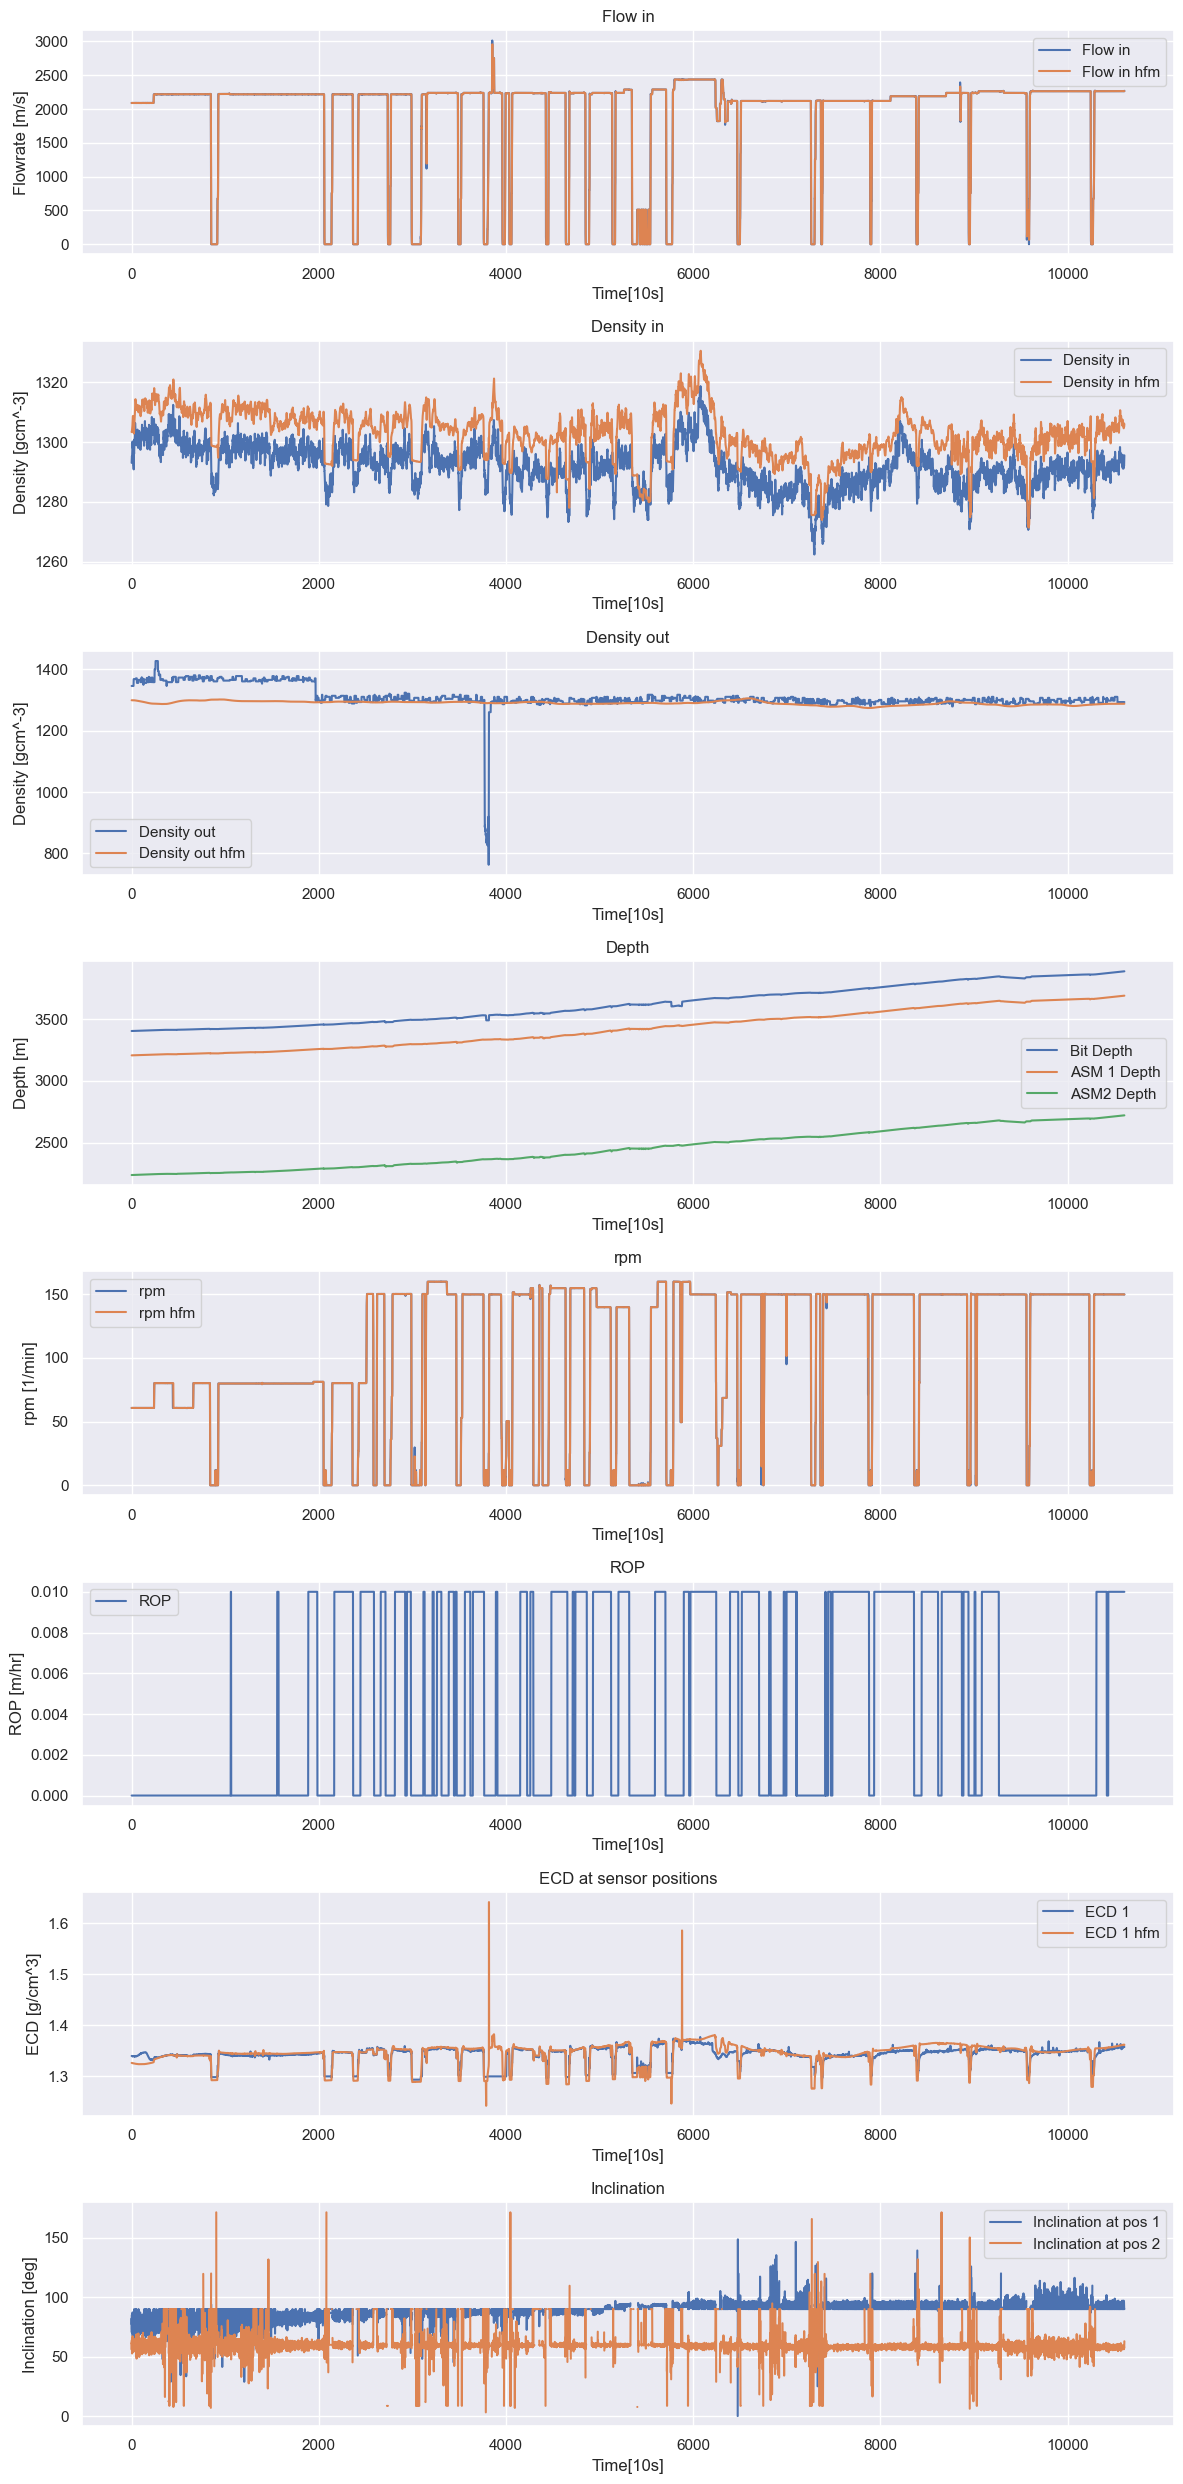

In [12]:
fig, ax = plt.subplots(8, figsize = (12,25))
ax[0].plot(flow_in_case_101.values, label = "Flow in")
# ax[0].plot(flow_out_case_101.values, label = "Flow out")
ax[0].plot(flow_in_case_101_hfm.values, label = "Flow in hfm")
ax[0].set_title("Flow in")
ax[0].set_ylabel("Flowrate [m/s]")
ax[0].set_xlabel("Time[10s]")
ax[0].legend()
ax[1].plot(density_in_case_101.values, label = "Density in")
ax[1].plot(density_in_case_101_hfm.values, label = "Density in hfm")
ax[1].set_title("Density in")
ax[1].set_ylabel("Density [gcm^-3]")
ax[1].set_xlabel("Time[10s]")
ax[1].legend()
ax[2].plot(density_out_case_101.values, label = "Density out")
ax[2].plot(density_out_case_101_hfm.values, label = "Density out hfm")
ax[2].set_title("Density out")
ax[2].set_ylabel("Density [gcm^-3]")
ax[2].set_xlabel("Time[10s]")
ax[2].legend()
ax[3].plot(depth_case_101.values, label = "Bit Depth")
ax[3].plot(depth_asm1_case_101.values, label = "ASM 1 Depth")
ax[3].plot(depth_asm2_case_101.values, label = "ASM2 Depth")
ax[3].set_title("Depth")
ax[3].set_ylabel("Depth [m]")
ax[3].set_xlabel("Time[10s]")
ax[3].legend()
ax[4].plot(rpm_case_101.values, label = "rpm")
ax[4].plot(rpm_case_101_hfm.values, label = "rpm hfm")
ax[4].set_title("rpm")
ax[4].set_ylabel("rpm [1/min]")
ax[4].set_xlabel("Time[10s]")
ax[4].legend()
ax[5].plot(rop_case_101.values, label = "ROP")
# ax[5].plot(rop_case_101_hfm.values, label = "ROP hfm")
ax[5].set_title("ROP")
ax[5].set_ylabel("ROP [m/hr]")
ax[5].set_xlabel("Time[10s]")
ax[5].legend()
ax[6].plot(ecd1_case_101.values, label = "ECD 1")
# ax[6].plot(ecd2_case_101.values, label = "ECD 2")
ax[6].plot(ecd1_case_101_hfm.values, label = "ECD 1 hfm")
# ax[6].plot(ecd2_case_101_hfm.values, label = "ECD 2 hfm")
ax[6].set_title("ECD at sensor positions")
ax[6].set_ylabel("ECD [g/cm^3]")
ax[6].set_xlabel("Time[10s]")
ax[6].legend()
ax[7].plot(inclination_asm1.values, label = "Inclination at pos 1")
ax[7].plot(inclination_asm2.values, label = "Inclination at pos 2")
ax[7].set_title("Inclination")
ax[7].set_ylabel("Inclination [deg]")
ax[7].set_xlabel("Time[10s]")
ax[7].legend()
plt.tight_layout()

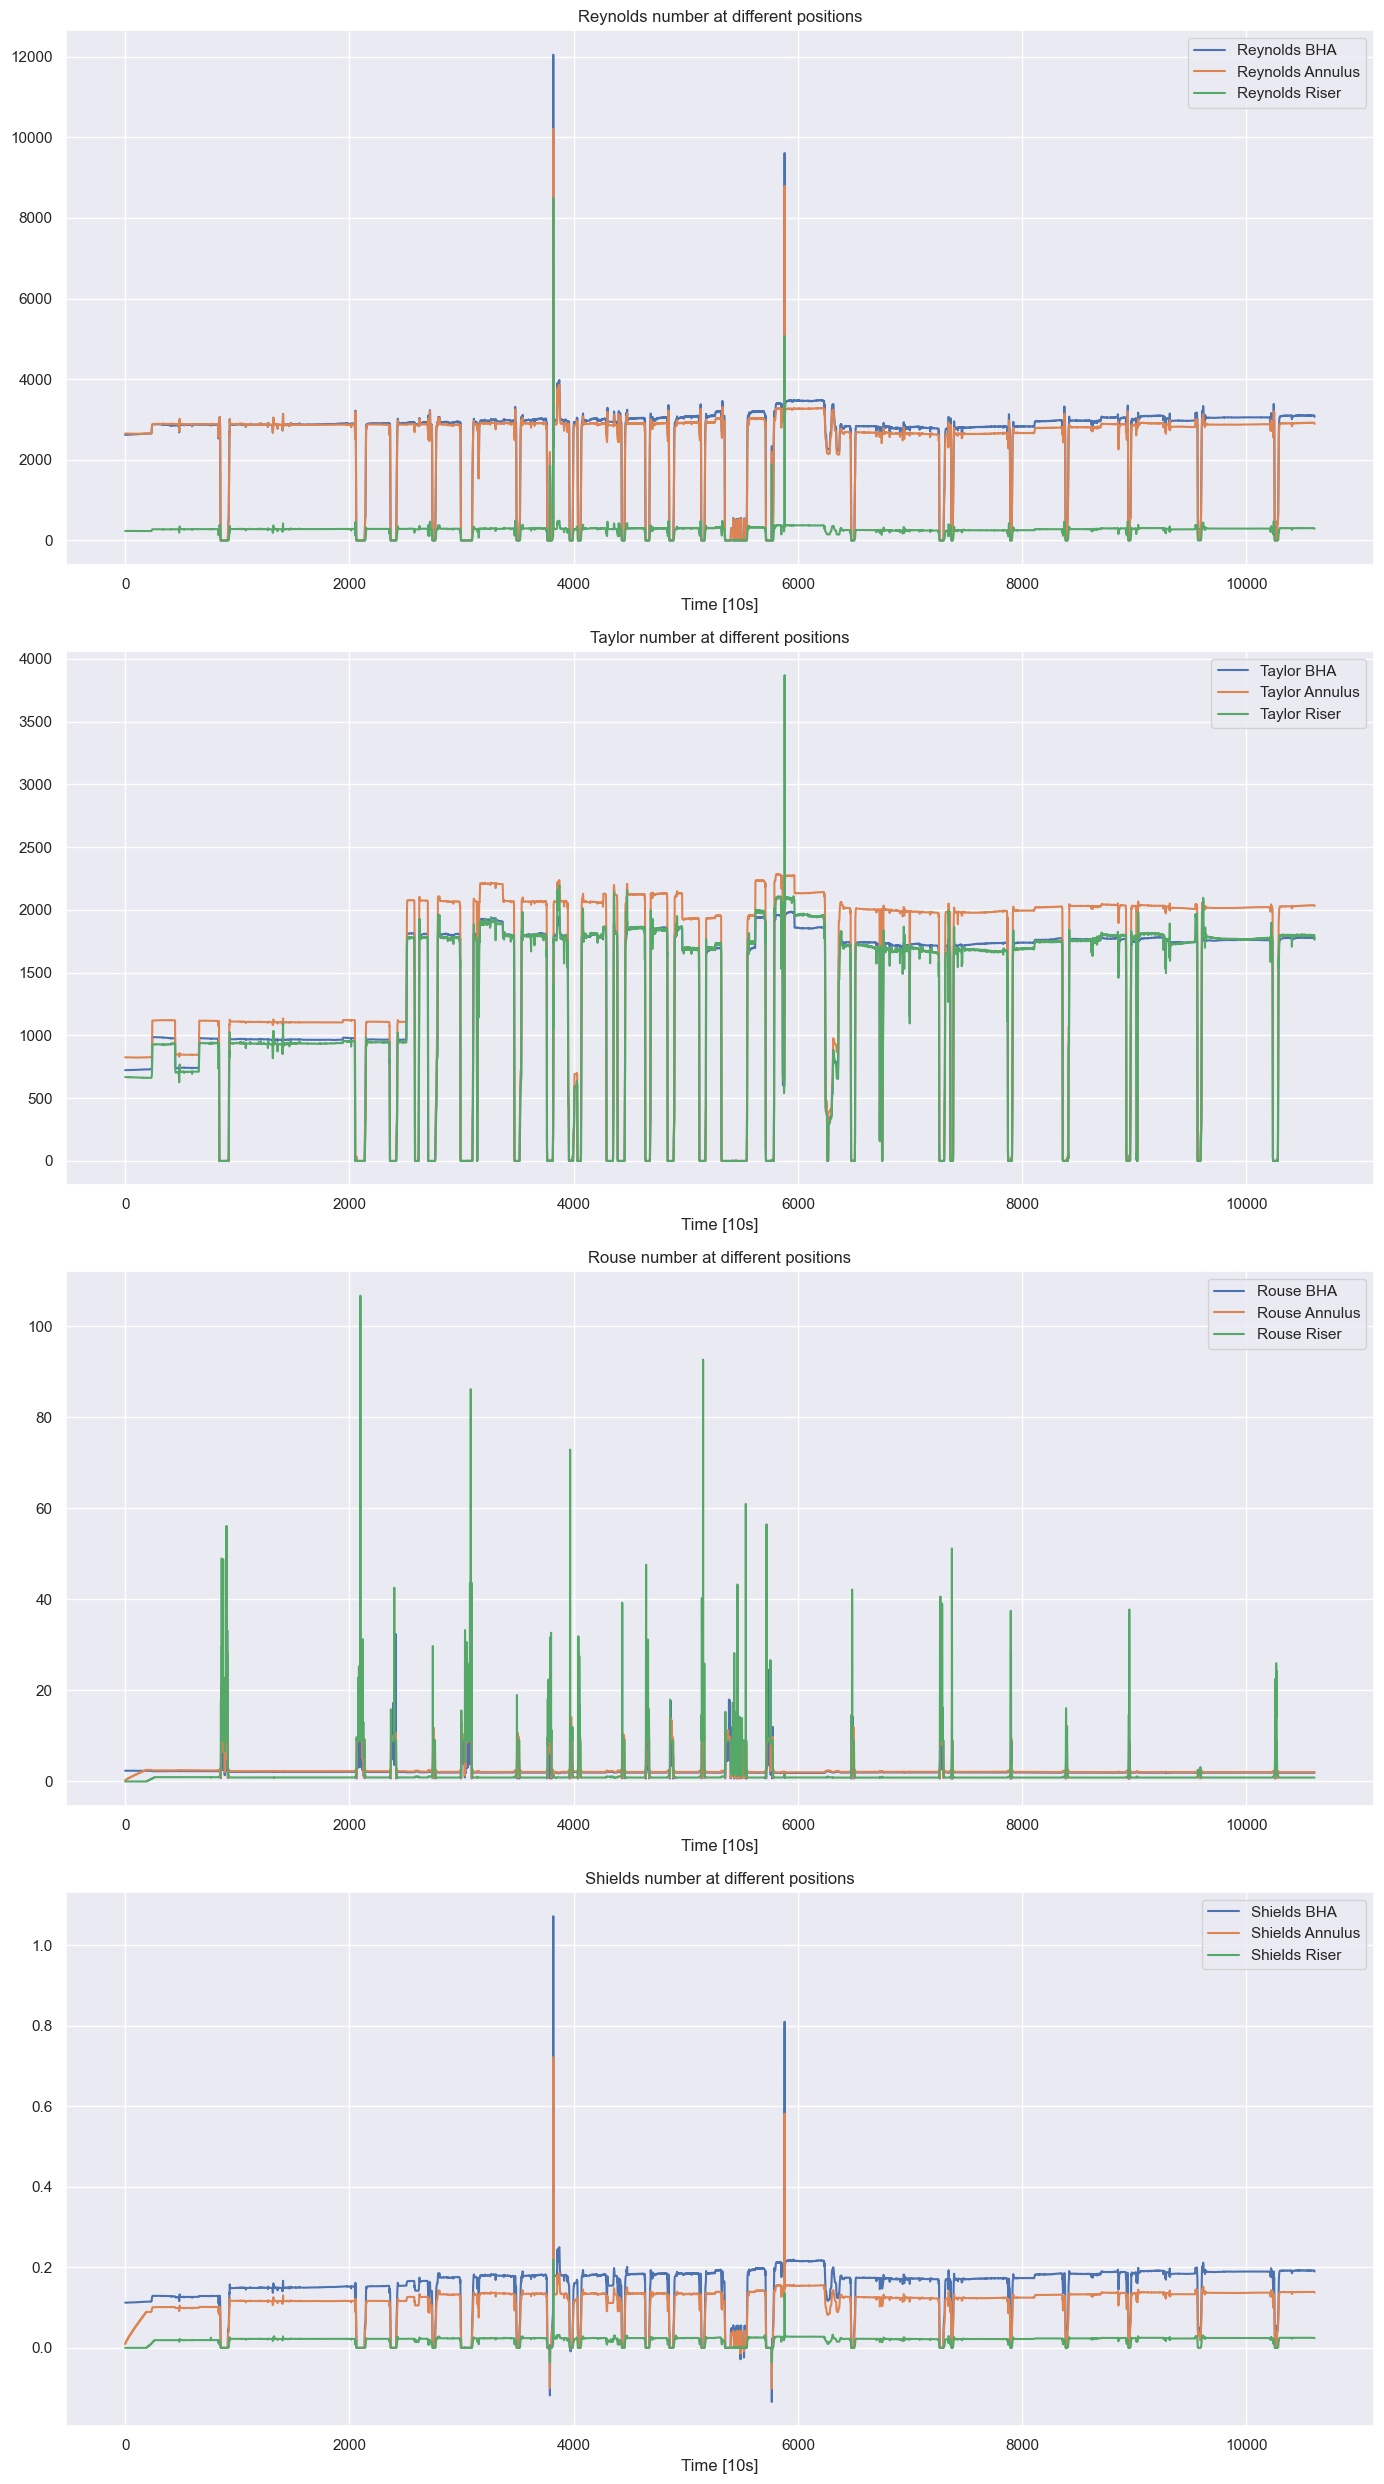

In [13]:
# Plot of dimentionless numbers
fig, ax = plt.subplots(4, figsize = (14,25))
ax[0].set_title("Reynolds number at different positions")
ax[0].plot(hfm_data_case_101_t["ReynBHA"].values, label = "Reynolds BHA")
ax[0].plot(hfm_data_case_101_t["ReynAnn"].values, label = "Reynolds Annulus")
ax[0].plot(hfm_data_case_101_t["ReynRiser"].values, label = "Reynolds Riser")
ax[0].set_xlabel("Time [10s]")
ax[0].legend()
ax[1].set_title("Taylor number at different positions")
ax[1].plot(hfm_data_case_101_t["TaylBHA"].values, label = "Taylor BHA")
ax[1].plot(hfm_data_case_101_t["TaylAnn"].values, label = "Taylor Annulus")
ax[1].plot(hfm_data_case_101_t["TaylRiser"].values, label = "Taylor Riser")
ax[1].set_xlabel("Time [10s]")
ax[1].legend()
ax[2].set_title("Rouse number at different positions")
ax[2].plot(hfm_data_case_101_t["RouseBHA"].values, label = "Rouse BHA")
ax[2].plot(hfm_data_case_101_t["RouseAnn"].values, label = "Rouse Annulus")
ax[2].plot(hfm_data_case_101_t["RouseRiser"].values, label = "Rouse Riser")
ax[2].set_xlabel("Time [10s]")
ax[2].legend()
ax[3].set_title("Shields number at different positions")
ax[3].plot(hfm_data_case_101_t["ShieldBHA"].values, label = "Shields BHA")
ax[3].plot(hfm_data_case_101_t["ShieldAnn"].values, label = "Shields Annulus")
ax[3].plot(hfm_data_case_101_t["ShieldRiser"].values, label = "Shields Riser")
ax[3].set_xlabel("Time [10s]")
ax[3].legend()
plt.tight_layout()

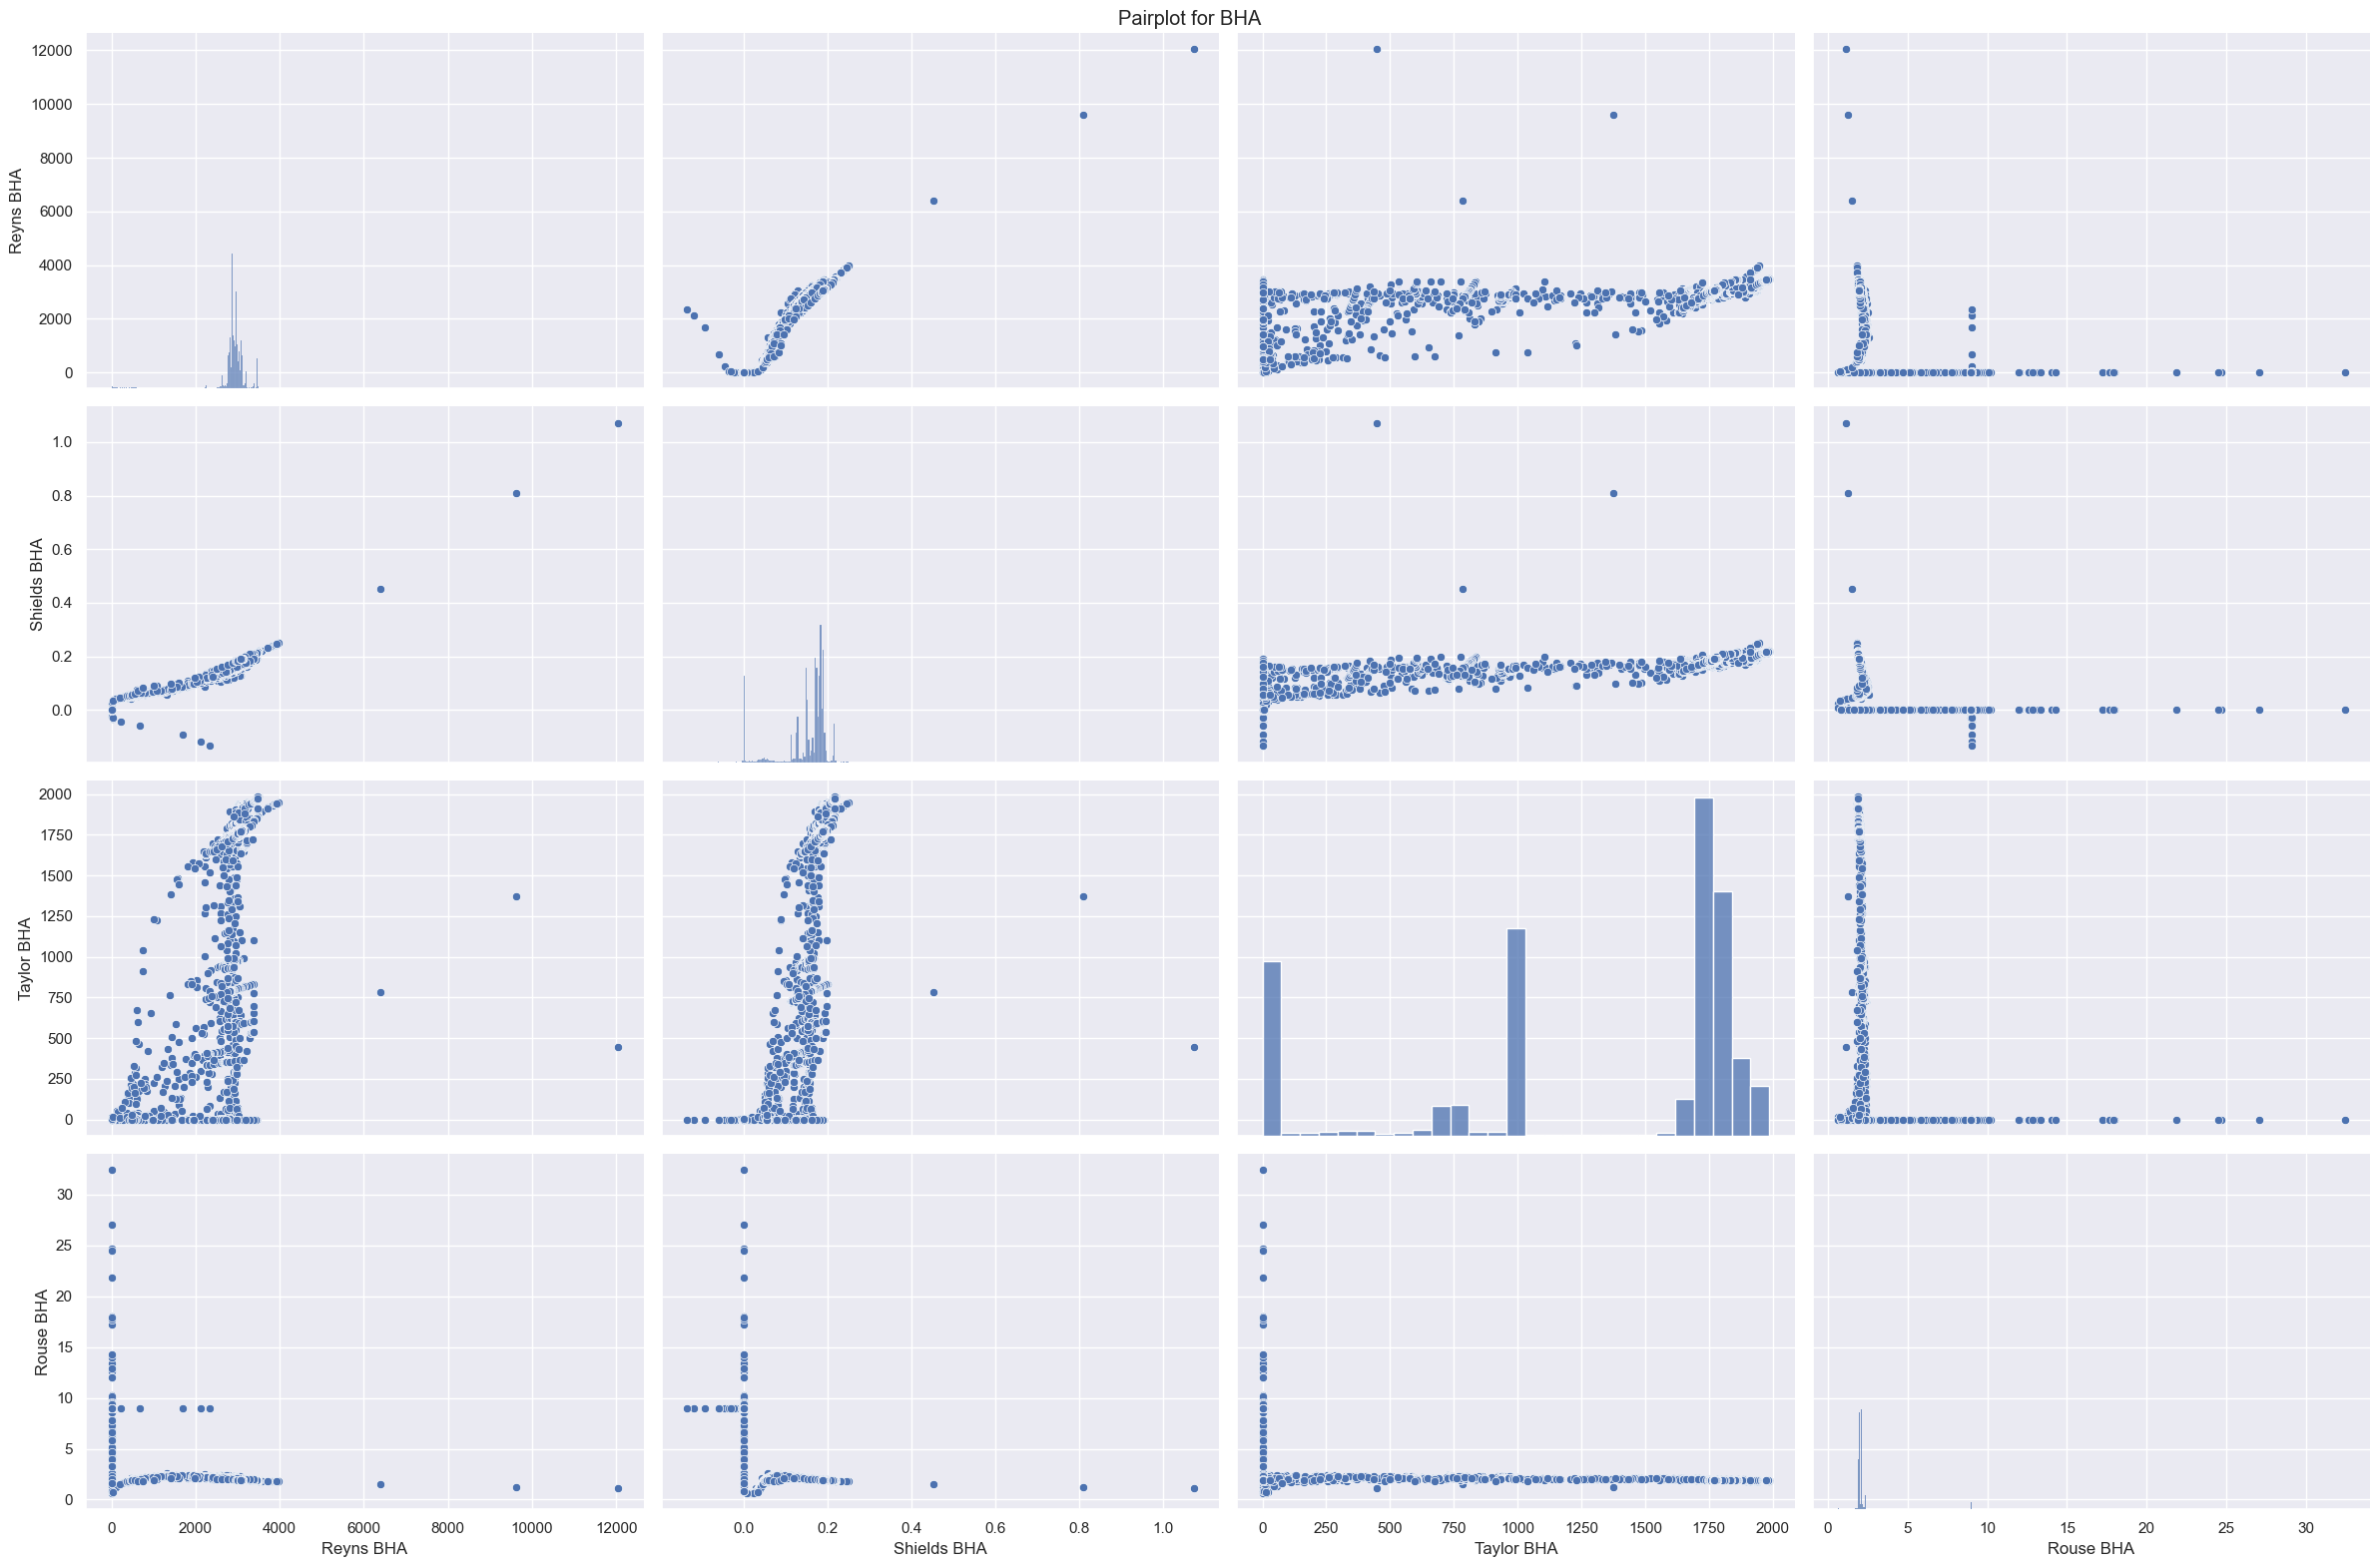

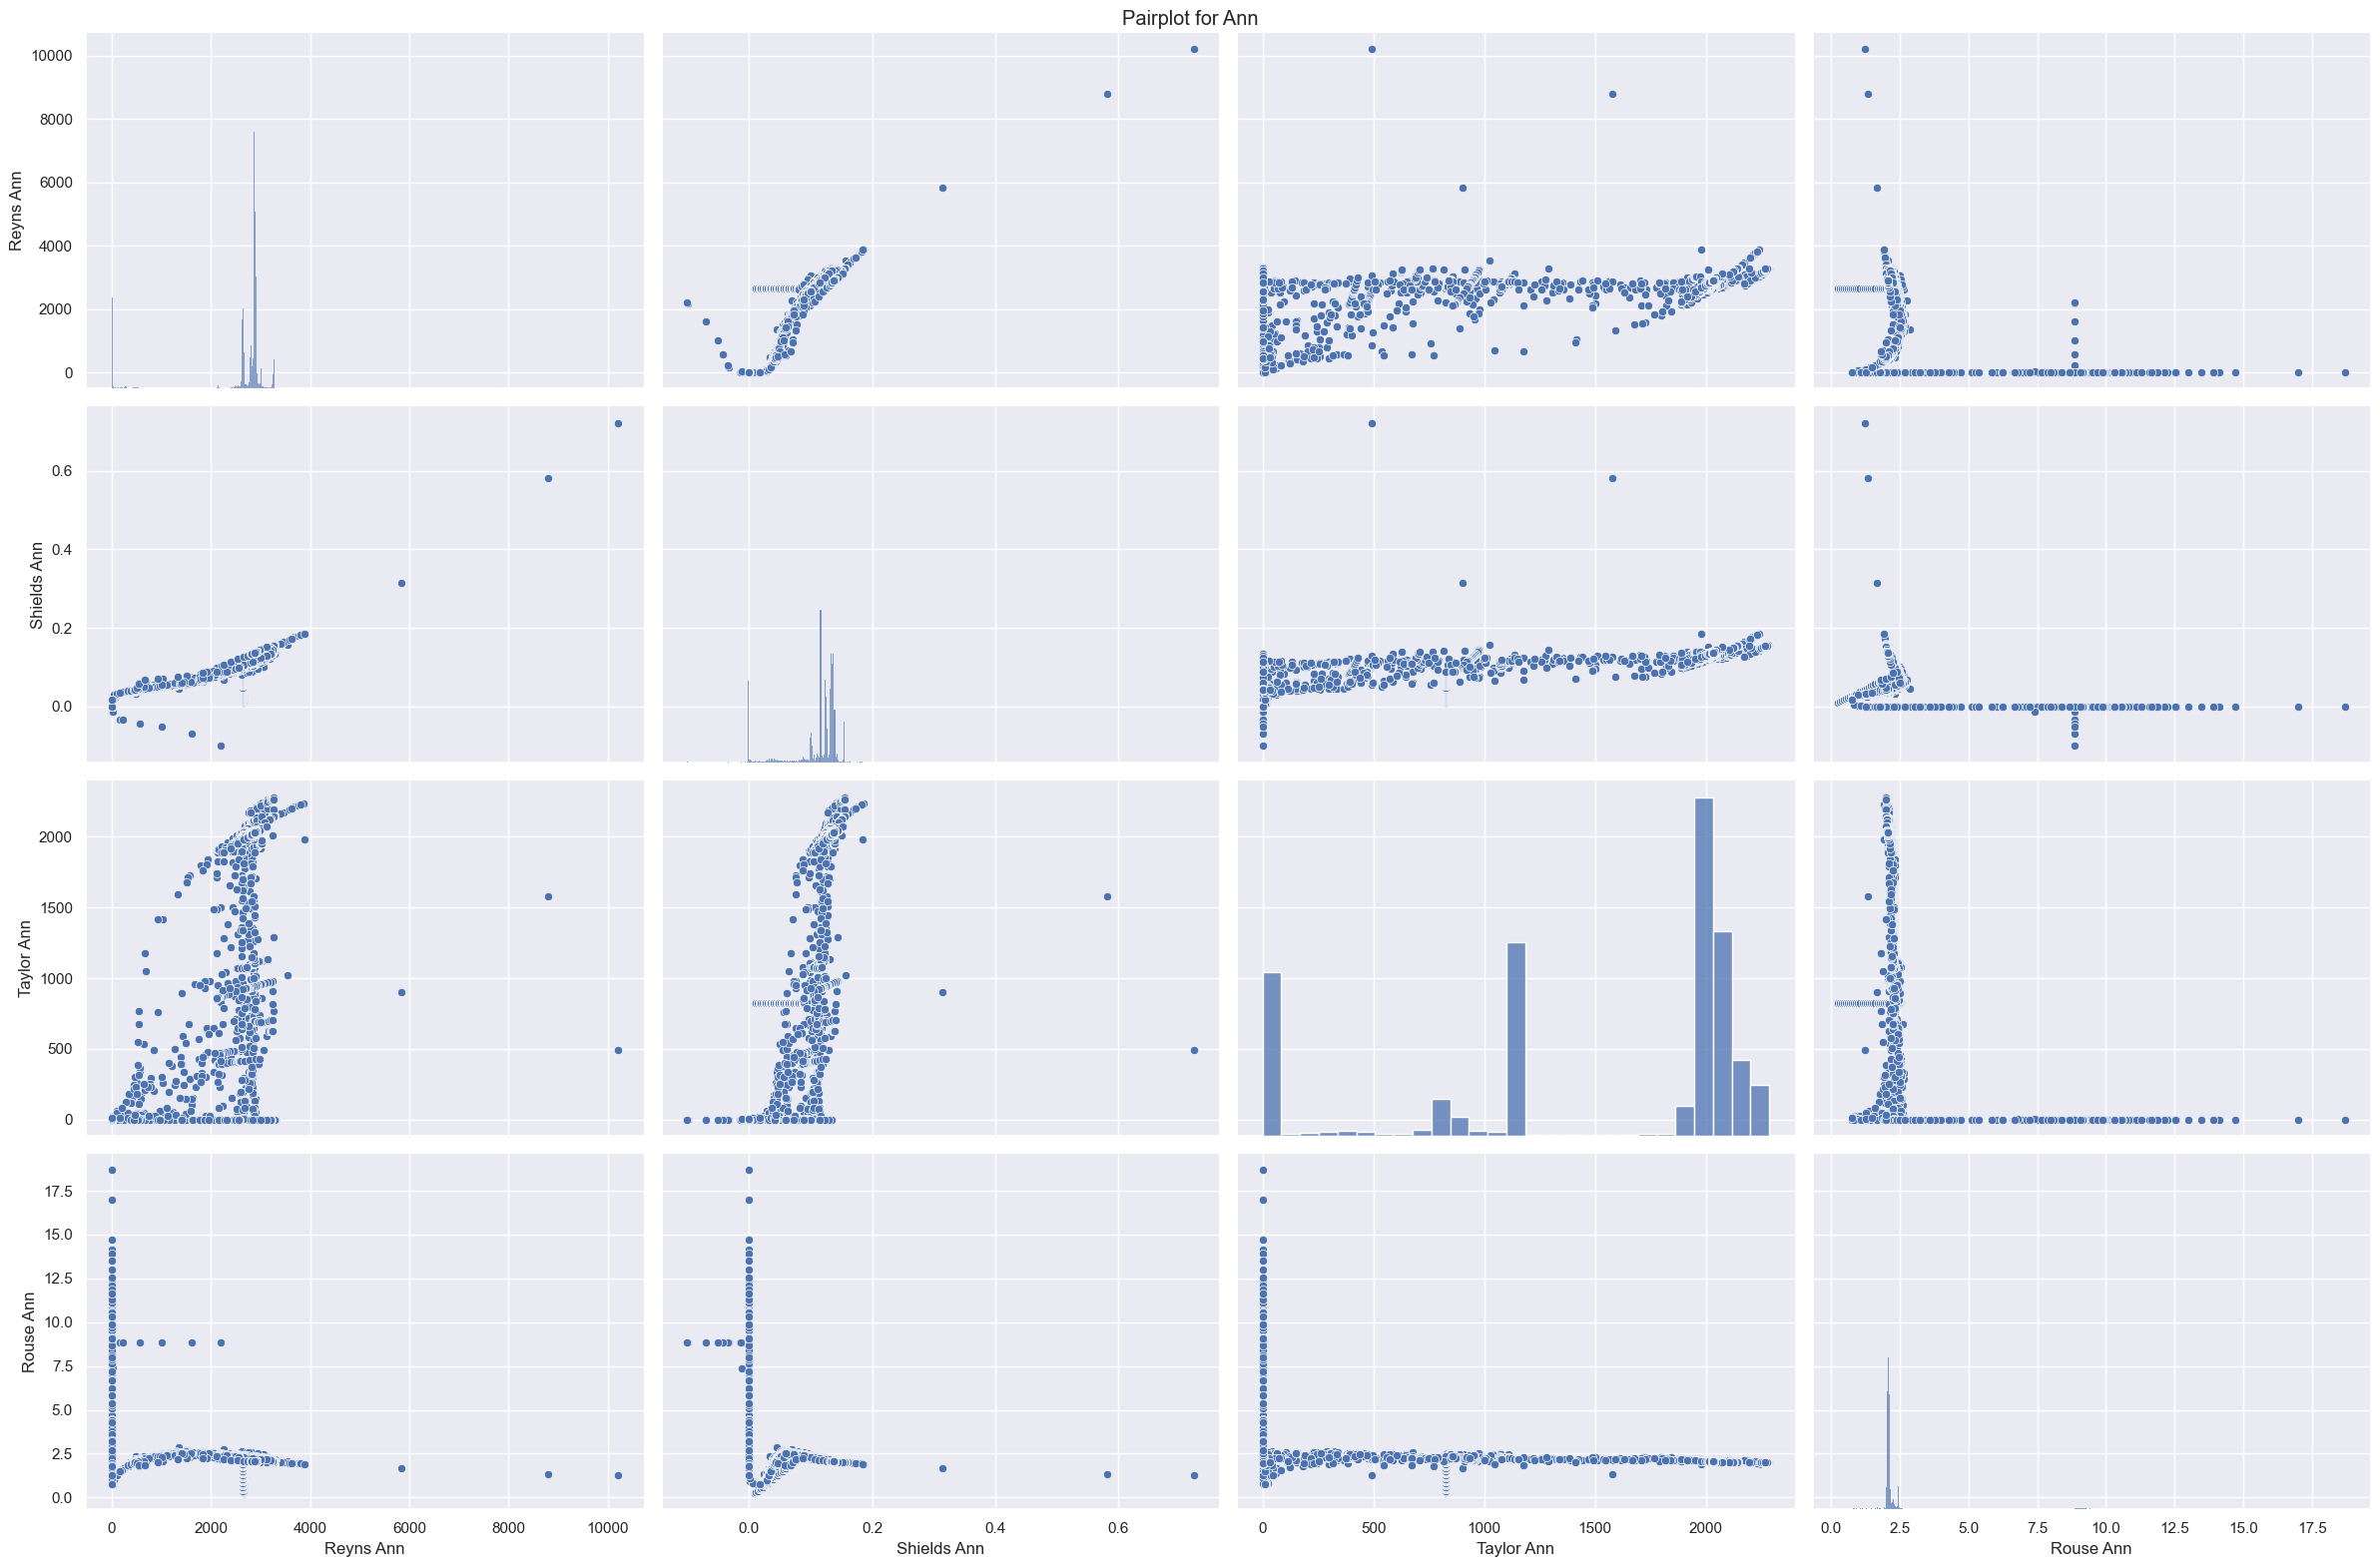

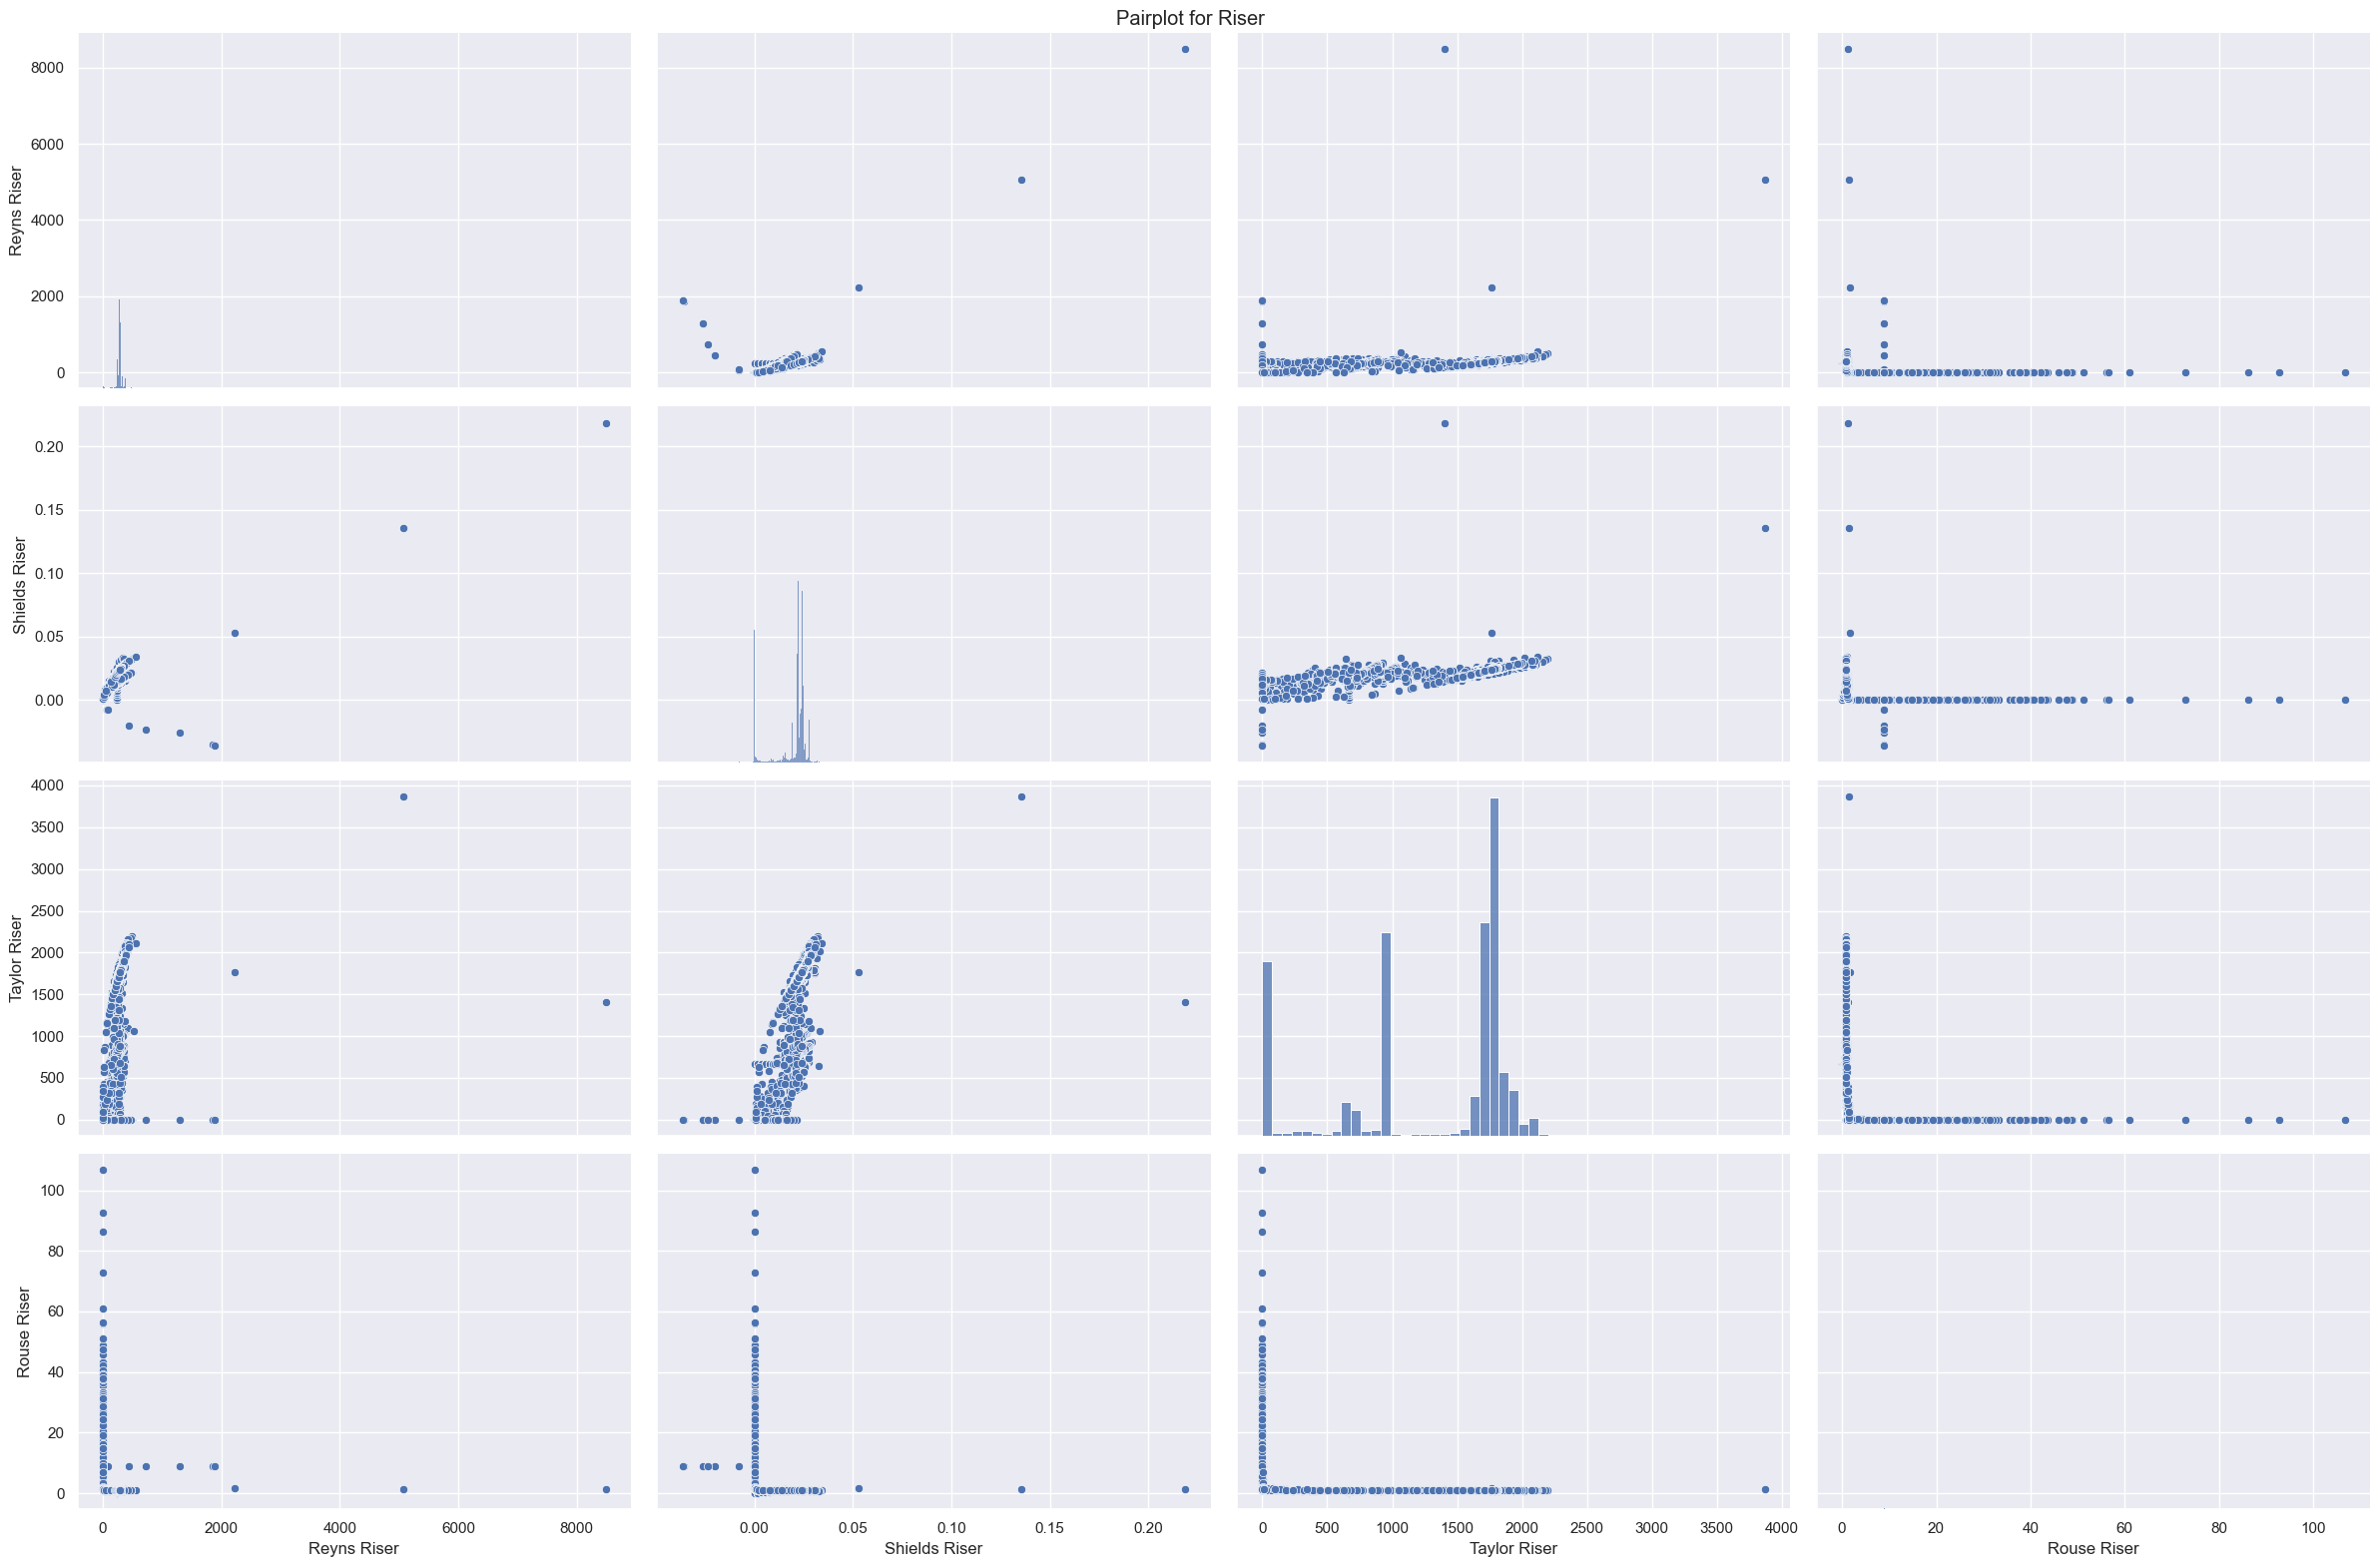

In [14]:
# Plotting the dimensionless numbers against each other
sns.pairplot(dimensionless_numbers_BHA, height=4, aspect=1.5)
plt.suptitle("Pairplot for BHA")
plt.tight_layout()
plt.show()
sns.pairplot(dimensionless_numbers_Ann, height=4, aspect=1.5)
plt.suptitle("Pairplot for Ann")
plt.tight_layout()
plt.show()
sns.pairplot(dimensionless_numbers_Riser, height=4, aspect=1.5)
plt.suptitle("Pairplot for Riser")
plt.tight_layout()
plt.show()

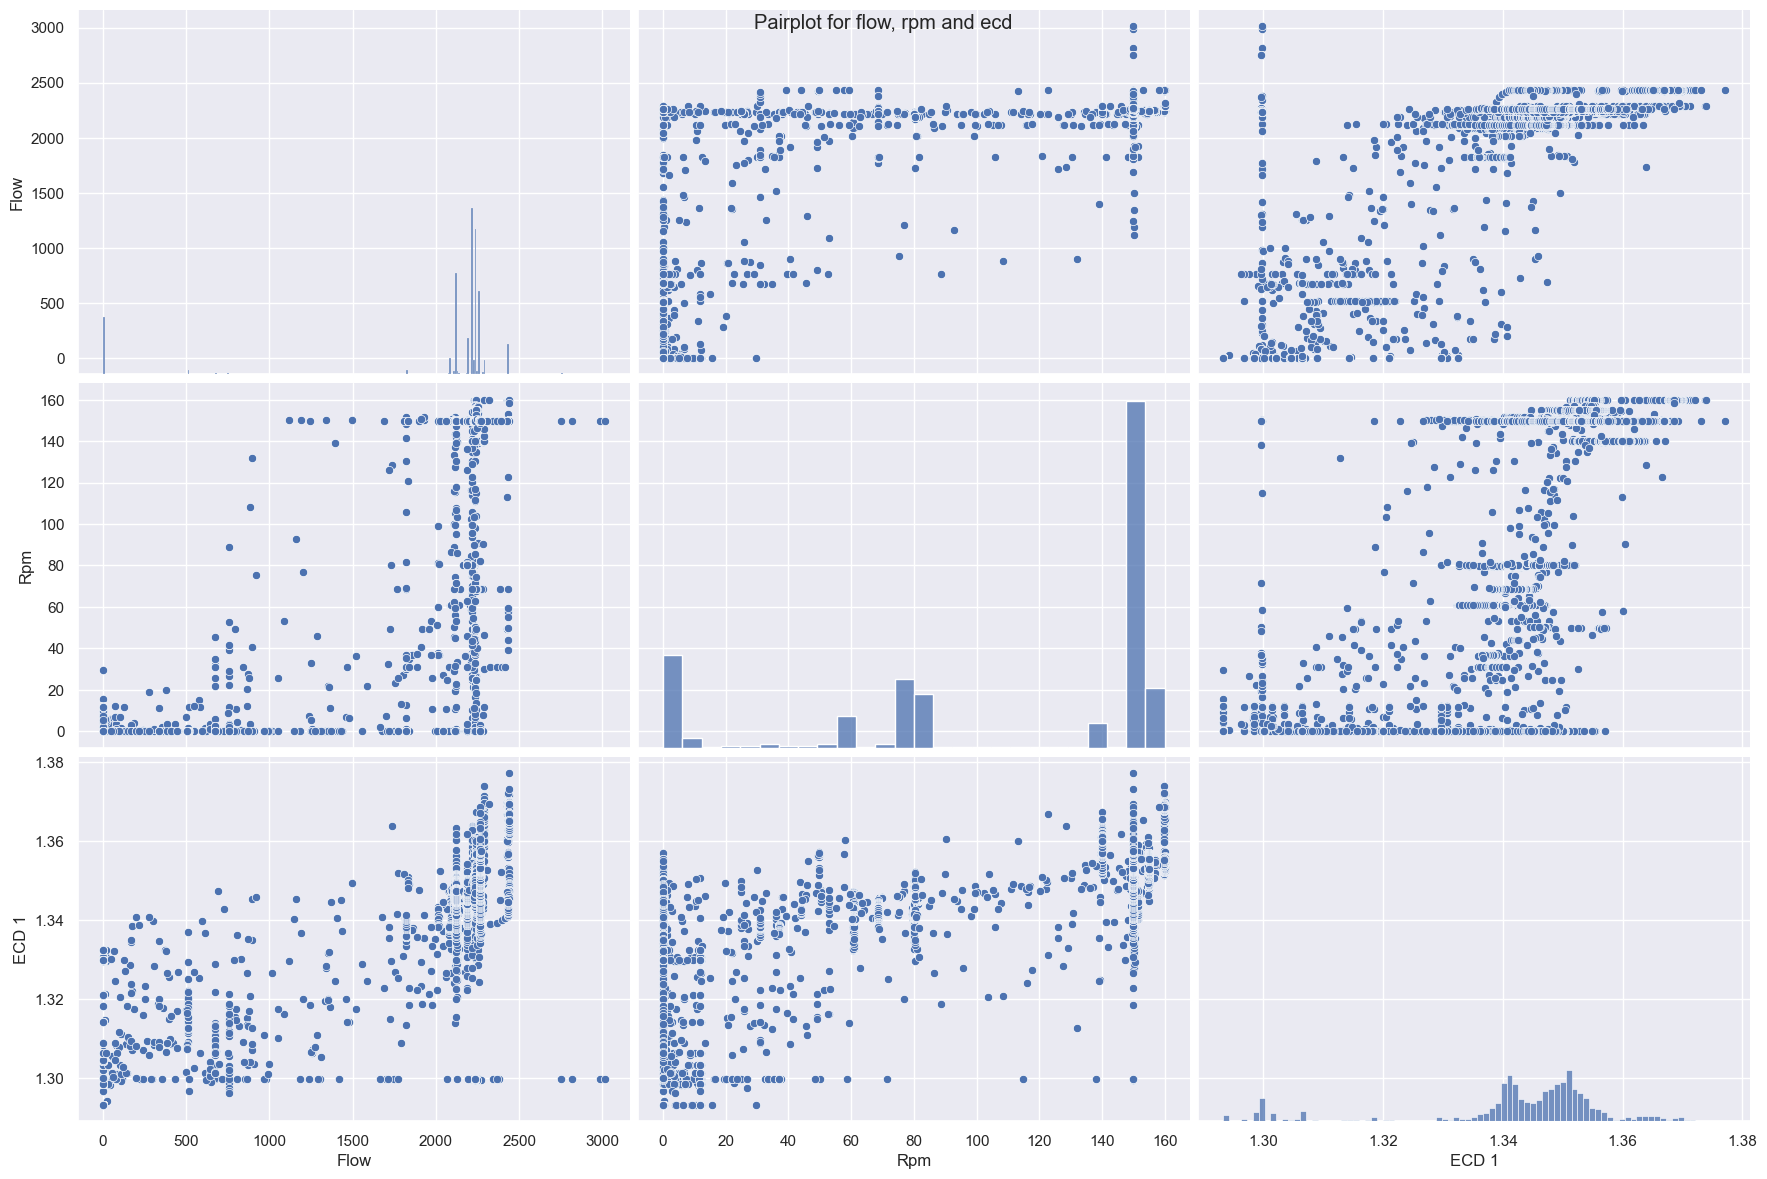

In [15]:
sns.pairplot(pairplot_flow_rpm_ecd, height = 4, aspect=1.5)
plt.suptitle("Pairplot for flow, rpm and ecd")
plt.show()